# CRNN for Axial Images

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
import numpy as np
import os
from tensorflow import keras

In [2]:
import os

def get_image_files(folder_path):
    """Get a sorted list of image files from a given folder based on the number before the underscore."""
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    image_files.sort(key=lambda x: int(x.split('_')[0]))  # Sort based on the number before the underscore
    return image_files

def get_mri_image_paths(base_folder):
    """Create a 2D array where each index is a list of paths to JPEG images for each MRI image, sorted by the number before the underscore."""
    mri_image_paths = []
    for class_folder in os.listdir(base_folder):
        class_path = os.path.join(base_folder, class_folder)
        if os.path.isdir(class_path):
            for mri_folder in os.listdir(class_path):
                mri_path = os.path.join(class_path, mri_folder)
                if os.path.isdir(mri_path):
                    image_files = get_image_files(mri_path)
                    image_paths = [os.path.join(mri_path, img_file) for img_file in image_files]
                    mri_image_paths.append(image_paths)
    return mri_image_paths

# Define base folder
base_folder = 'Organized_Image_Data copy 2'

# Get MRI image paths
mri_image_paths = get_mri_image_paths(base_folder)

# mri_image_paths now contains a 2D array with paths to JPEG images sorted by the number before the underscore
# for i, paths in enumerate(mri_image_paths):
#     print(f"Image paths for MRI {i}: {paths}")

In [3]:
final_data = []
for x in mri_image_paths:
    start =  (len(x) // 2)  - 2
    lst = []
    for i in range(4):
        lst.append(x[start + i])
    final_data.append(lst)
        

In [4]:
# final_data

In [5]:
len(final_data)

434

In [6]:
ids = []
for lst in final_data:
    id_ = lst[i].split('_')
    id_num = id_[-1].strip(".jpg")
    ids.append(id_num)

In [7]:

# Example list of IDs

# Load the CSV file into a pandas DataFrame
csv_file = 'newAxial_6_26_2024.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Initialize lists for IDs and corresponding categories
y = []

# Find categories for each ID in id_list
for id_num in ids:
    row = df[df['Image Data ID'] == id_num]
    y.append(row['Group'].iloc[0])  # Assuming 'Category' is a single value per ID

# Print found IDs and categories
# print("y:", y)
# print(len(y))

# # Create train/test splits
# train_ids, test_ids, train_categories, test_categories = train_test_split(found_ids, categories, test_size=0.2, random_state=42)

# # Print train/test splits
# print("\nTrain IDs:", train_ids)
# print("Train Categories:", train_categories)
# print("\nTest IDs:", test_ids)
# print("Test Categories:", test_categories)


In [8]:
from sklearn.model_selection import train_test_split
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.2, random_state=42)


In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [10]:
# Iterate through the dataset and print the contents
for sequence, label in train_dataset:
    print("Sequence shape:", sequence.shape)  # Print shape of the sequence (batch of images)
    print("Label:", label.numpy())  # Convert label tensor to numpy array and print it
    # Optionally, visualize or process each sequence here


Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'AD'
Sequence shape: (4,)
Label: b'AD'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'AD'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'AD'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'AD'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'AD'
Sequence shape: (4,)
Label: b'CN'
Sequence shape: (4,)
Label: b'MCI'
Sequence shape: (4,)
Label: b'MCI'
Seq

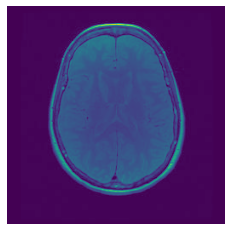

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = "Organized_Image_Data copy 2/AD/I30873/20_I30873.jpg"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Optional: turn off axis labels
plt.show()


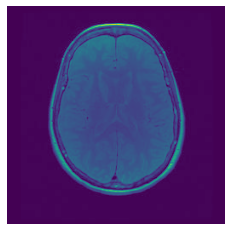

Image shape: (256, 256)
Pixel values:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = "Organized_Image_Data copy 2/AD/I30873/20_I30873.jpg"

# Load the image using matplotlib
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get pixel values
pixels = img

# Print all pixel values
print("Image shape:", pixels.shape)
print("Pixel values:")

# Print pixel values directly
print(pixels)


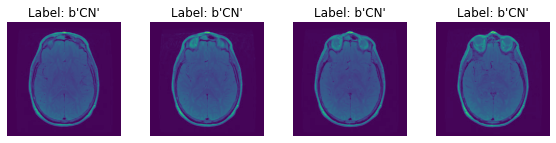

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Assuming train_dataset is your TensorFlow dataset
for sequence, label in train_dataset.take(1):  # Take the first batch
    plt.figure(figsize=(20, 2))  # Adjust the figure size as needed
    
    for i, image_path in enumerate(sequence):
        image_path_str = image_path.numpy().decode('utf-8')  # Convert bytes to string
        image = Image.open(image_path_str)  # Load image using PIL (you can also use OpenCV)
        
        plt.subplot(1, 10, i + 1)  # 1 row, 10 columns, i+1 is the index of the subplot
        plt.imshow(image)
        plt.title(f"Label: {label.numpy()}")
        plt.axis("off")
    
    plt.tight_layout()  # Adjust spacing between plots
    plt.show()


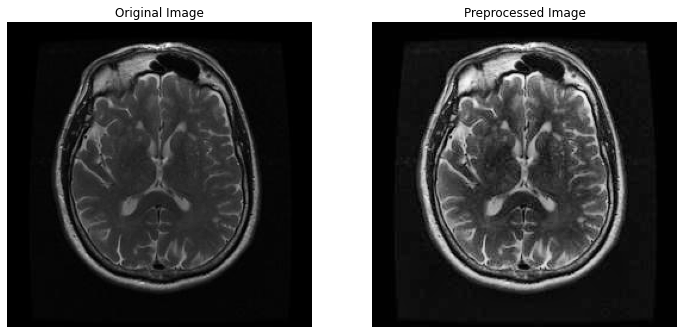

In [14]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    image = cv2.resize(image, (256, 256))  # Resize to 256x256 if necessary
    preprocessed_image = exposure.equalize_adapthist(image)  # Apply adaptive histogram equalization
    preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)  # Add channel dimension for compatibility
    return image, preprocessed_image

# Example usage
image_path = final_data[0][0]
original_image, preprocessed_image = preprocess_image(image_path)

# Display the original and preprocessed images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(original_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(preprocessed_image.squeeze(), cmap='gray')
axs[1].set_title('Preprocessed Image')
axs[1].axis('off')

plt.show()


In [ ]:
import numpy as np
import cv2

# Assume `gray_pixels` is a 2D list or a 2D NumPy array containing the grayscale pixel values


# Convert the list to a NumPy array if it's not already one
gray_image = np.array(preprocessed_image, dtype=np.uint8)

# Convert the grayscale image to RGB by stacking the grayscale values across the color channels
rgb_image = np.stack((gray_image,) * 3, axis=-1)

# Optionally display the image using OpenCV
cv2.imshow('RGB Image', rgb_image)



In [15]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from PIL import Image

def preprocess_image(image_path):
    # Open the image using PIL
    image = Image.open(image_path)
    
    # Convert PIL Image to numpy array
    image = np.array(image)
    
    # Convert to grayscale if necessary
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    image = cv2.resize(image, (256, 256))  # Resize to 256x256 if necessary
    preprocessed_image = exposure.equalize_adapthist(image)  # Apply adaptive histogram equalization
    preprocessed_image = preprocessed_image / 255.0  # Normalize the image to [0, 1] range
    preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)  # Add channel dimension for compatibility
    
    return image, preprocessed_image

# Example usage
# image_path = final_data[0][0]
# original_image, preprocessed_image = preprocess_image(image_path)

# # Display the original and preprocessed images
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# axs[0].imshow(original_image, cmap='gray')
# axs[0].set_title('Original Image')
# axs[0].axis('off')

# axs[1].imshow(preprocessed_image.squeeze(), cmap='gray')
# axs[1].set_title('Preprocessed and Normalized Image')
# axs[1].axis('off')

# plt.show()


# BUILD CRNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, Reshape, MaxPooling2D, BatchNormalization, ReLU, Dropout, Reshape, LSTM, TimeDistributed
from tensorflow.keras.regularizers import l2

In [17]:
shape_CNN = (10,256,256,32)
shape = (10,256,256,1)

In [18]:

def Model(shape):
    
    model = Sequential()
    model.add(Input(shape = shape))
    # First Block
    model.add(TimeDistributed(Conv2D(32, (2, 2), activation="relu", padding="same")))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))

    # Second Block
    model.add(TimeDistributed(Conv2D(64,(2,2),1,activation = "relu",padding = "same")))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))

    #Third Block
    model.add(TimeDistributed(Conv2D(128,(2,2),1,activation = "relu",padding = "same")))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))

    # Fourth Block
    model.add(TimeDistributed(Conv2D(256,(2,2),1,activation = "relu",padding = "same")))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))
    
    # Fifth Block
    model.add(TimeDistributed(Flatten()))  # Flatten before LSTM
    # Reshape to fit LSTM input
     # Assuming 32*32*128 = 4096 after flattening
    # RNN Layers
    model.add(LSTM(128,return_sequences = True))
    model.add(LSTM(64))

    # Final Layer

    model.add((Dense(512,activation = "sigmoid")))
    model.add((Dense(64,activation = "sigmoid")))
    model.add((Dense(3,activation = "softmax")))

    return model


In [19]:
model = Model(shape)

In [20]:
model.compile('adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 10, 256, 256, 32)  160       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 256, 256, 32)  128       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 128, 128, 32)  0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 128, 128, 64)  8256      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 128, 128, 64)  256       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 64, 64, 64)    0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 64, 64, 128)   3

In [22]:
len(X_train)

347

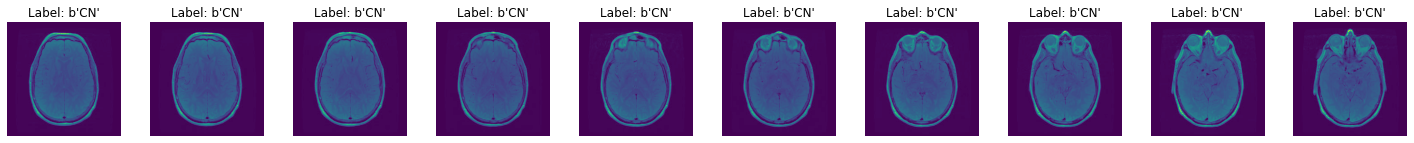

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Assuming train_dataset is your TensorFlow dataset
for sequence, label in train_dataset.take(1):  # Take the first batch
    plt.figure(figsize=(20, 2))  # Adjust the figure size as needed
    
    for i, image_path in enumerate(sequence):
        image_path_str = image_path.numpy().decode('utf-8')  # Convert bytes to string
        image = Image.open(image_path_str)  # Load image using PIL (you can also use OpenCV)
        
        plt.subplot(1, 10, i + 1)  # 1 row, 10 columns, i+1 is the index of the subplot
        plt.imshow(image)
        plt.title(f"Label: {label.numpy()}")
        plt.axis("off")
    
    plt.tight_layout()  # Adjust spacing between plots
    plt.show()

In [24]:
for sequence, label in train_dataset.take(1):  # Take the first batch
    plt.figure(figsize=(20, 2))  # Adjust the figure size as needed
    
    for i, image_path in enumerate(sequence):
        image_path_str = image_path.numpy().decode('utf-8')  # Convert bytes to string
        print(image_path_str)

Organized_Image_Data copy 2/CN/I36116/20_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/21_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/22_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/23_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/24_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/25_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/26_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/27_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/28_I36116.jpg
Organized_Image_Data copy 2/CN/I36116/29_I36116.jpg


<Figure size 1440x144 with 0 Axes>

In [25]:
from PIL import Image
import numpy as np

def get_values(path):
    # Assuming final_data[0][0] contains the path to your image
    image_path = path
    
    # Open the image using PIL
    im = Image.open(image_path)
    
    # Convert PIL Image to numpy array
    im_array = np.array(im)
    im_array = im_array / 255
    # Now you can access and manipulate the image as a numpy array
    return(im_array)  # Check the shape of the numpy array


In [26]:
# print(get_values(final_data[0][0]))

In [27]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example y labels (replace with your actual labels)

# Initialize the LabelEncoder
map = {"CN":0, "MCI":1,"AD":2}

y_numeric = [map[label] for label in y]
# print("Original labels:", y)
# print("Numeric labels:", y_numeric)

    

In [28]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed
# from tensorflow.keras.layers import Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.utils import to_categorical

# # Set the random seed for reproducibility
# np.random.seed(42)

# # Number of samples
# num_samples = 100

# # Generate random data
# X_fake = np.random.rand(num_samples, 10, 256, 256, 1)

# # Generate random labels (3 classes)
# y_fake = np.random.randint(3, size=num_samples)

# # Convert labels to one-hot encoding
# y_fake = to_categorical(y_fake, num_classes=3)

# print(f'X_fake shape: {X_fake.shape}')
# print(f'y_fake shape: {y_fake.shape}')

# def build_crnn(input_shape):
#     model = Sequential()
    
#     # Add the first convolutional layer
#     model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=input_shape))
#     model.add(TimeDistributed(BatchNormalization()))
#     model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    
#     # Add the second convolutional layer
#     model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
#     model.add(TimeDistributed(BatchNormalization()))
#     model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    
#     # Optionally, add a third convolutional layer
#     model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')))
#     model.add(TimeDistributed(BatchNormalization()))
#     model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    
#     # Flatten the output and feed it into an LSTM layer
#     model.add(TimeDistributed(Flatten()))
#     model.add(LSTM(64, return_sequences=True))
#     model.add(LSTM(64))
    
#     # Add a dropout layer
#     model.add(Dropout(0.5))
    
#     # Add a dense layer with softmax activation for classification
#     model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for Alzheimer's stages
    
#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
#     return model

# # Define the input shape (number_of_slices, height, width, channels)
# shape_2 = (10, 256, 256, 1)

# # # Build the model
# model_crnn = build_crnn(shape_2)
# model_crnn.summary()
# # Split the data into training and testing sets
# X_train, X_test = X_fake[:80], X_fake[80:]
# y_train, y_test = y_fake[:80], y_fake[80:]

# # print(X_train.shape)

# # print(y_train.shape)
# # #Train the model on the training set
# # model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# # # Evaluate the model on the test set
# # test_loss, test_accuracy = model.evaluate(X_test, y_test)
# # print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [29]:

total_images = []
counter = 10
for x in final_data:
    image_pixels = []
    for image in x:
        normal,preprocess = preprocess_image(image)
        image_pixels.append(preprocess)
        #image_pixels.append(get_values(image))
    X_train_true = np.expand_dims(image_pixels, axis=-1)
    
    total_images.append(image_pixels)

In [30]:
total_images_test = np.array(total_images)

In [31]:
total_images_test.shape

(434, 10, 256, 256, 1)

In [32]:
y_test = np.array(y_numeric)

In [33]:
y_test.shape

(434,)

In [34]:
total_images_test = total_images_test.reshape((434, 10, 256, 256, 1))

In [35]:
y_test.shape

(434,)

In [36]:
shuffle_data = list(zip(total_images_test,y_test))

In [37]:
np.random.shuffle(shuffle_data)

In [38]:
total_images_test,y_test = zip(*shuffle_data)

In [39]:
total_images_test = np.array(total_images_test)
y_test = np.array(y_test)

In [40]:
# Replace X_train and y_train with your actual training data
model.fit(total_images_test, y_test, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
11/11 [==============================] - 137s 12s/step - loss: 1.1252 - accuracy: 0.3170 - val_loss: 1.1422 - val_accuracy: 0.2874
Epoch 2/10
11/11 [==============================] - 128s 12s/step - loss: 1.1209 - accuracy: 0.3401 - val_loss: 1.0987 - val_accuracy: 0.3103
Epoch 3/10
11/11 [==============================] - 123s 11s/step - loss: 1.1115 - accuracy: 0.2824 - val_loss: 1.0909 - val_accuracy: 0.4023
Epoch 4/10
11/11 [==============================] - 124s 11s/step - loss: 1.1222 - accuracy: 0.3429 - val_loss: 1.1104 - val_accuracy: 0.3103
Epoch 5/10
11/11 [==============================] - 127s 12s/step - loss: 1.1234 - accuracy: 0.3429 - val_loss: 1.1145 - val_accuracy: 0.4023
Epoch 6/10
11/11 [==============================] - 126s 11s/step - loss: 1.1231 - accuracy: 0.3199 - val_loss: 1.0951 - val_accuracy: 0.3103
Epoch 7/10
11/11 [==============================] - 124s 11s/step - loss: 1.1155 - accuracy: 0.3084 - val_loss: 1.0941 - val_accuracy: 0.4023
Epoch 

KeyboardInterrupt: 

In [42]:
from tensorflow.keras.applications import ResNet50

In [43]:
res_shape = (10,256,256,1)

In [44]:
def resnet(shape):
    model = Sequential()
    
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape= shape)
    resnet_model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)
    
    for layer in resnet_model.layers:
        layer.trainable = False  # Freeze the ResNet layers

    model = Sequential()
    model.add(Input(shape=shape))
    
    # Apply ResNet to each frame
    model.add(TimeDistributed(resnet_model))
    
    # Additional layers
    model.add(TimeDistributed(Flatten()))  # Flatten before LSTM
    
    # LSTM Layers
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))

    # Fully Connected Layers
    model.add(Dense(512, activation='sigmoid'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(3, activation='softmax'))

    return model


In [45]:
model_res = Model(shape)
model_res.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_23 (TimeDis (None, 10, 256, 256, 32)  160       
_________________________________________________________________
time_distributed_24 (TimeDis (None, 10, 256, 256, 32)  128       
_________________________________________________________________
time_distributed_25 (TimeDis (None, 10, 128, 128, 32)  0         
_________________________________________________________________
time_distributed_26 (TimeDis (None, 10, 128, 128, 64)  8256      
_________________________________________________________________
time_distributed_27 (TimeDis (None, 10, 128, 128, 64)  256       
_________________________________________________________________
time_distributed_28 (TimeDis (None, 10, 64, 64, 64)    0         
_________________________________________________________________
time_distributed_29 (TimeDis (None, 10, 64, 64, 128)  

In [46]:
model_res.compile('adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
#model_res.fit(total_images_test, y_test, epochs=10, batch_size=32, validation_split=0.2)

In [64]:
import tensorflow as tf
from tensorflow.keras import layers

# Constants for the ViT model
embedding_dim = 256
patch_size = (16, 16)  # Example patch size
input_shape = (256, 256, 1)  # Example input shape for grayscale images
num_classes = 2  # Example number of output classes

# Calculate num_patches based on input shape and patch size
num_patches = (input_shape[0] // patch_size[0]) * (input_shape[1] // patch_size[1])

# Define positional embeddings, if used
positional_embedding = layers.Embedding(input_dim=num_patches, output_dim=embedding_dim)

def create_vit_model(input_shape, num_classes):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    
    # Patching
    x = layers.Conv2D(embedding_dim, patch_size, strides=patch_size, padding="valid")(inputs)
    x = layers.Reshape((num_patches, embedding_dim))(x)
    
    # Positional embeddings
    x = positional_embedding(x)
    
    # Transformer Encoder
    num_transformer_layers = 12
    num_heads = 8
    dim_ffn = 512
    
    for _ in range(num_transformer_layers):
        # Multi-head self-attention
        attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(x, x)
        x = layers.Add()([attn_output, x])  # Residual connection
        x = layers.LayerNormalization(epsilon=1e-6)(x)  # Layer normalization
        
        # Feedforward network
        ffn = tf.keras.Sequential([
            layers.Dense(dim_ffn, activation='relu'),
            layers.Dense(embedding_dim),
        ])
        x = ffn(x)
        
        x = layers.Add()([x, attn_output])  # Second residual connection
        x = layers.LayerNormalization(epsilon=1e-6)(x)  # Layer normalization
    
    # Classification head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    # Create model instance
    vit_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="vit_model")
    
    # Compile model
    vit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return vit_model

# Create ViT model
vit_model = create_vit_model(input_shape, num_classes)


In [66]:
# Reshape the data to match model input shape
total_images_test_reshaped = total_images_test.reshape(-1, 10, 256, 256, 1)

# Verify the reshaped data shape
print("Reshaped data shape:", total_images_test_reshaped.shape)  # Should output (434, 10, 256, 256, 1)

# Fit the model with the reshaped data
vit_model.fit(total_images_test_reshaped, y_test, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Reshaped data shape: (434, 10, 256, 256, 1)
Epoch 1/10


ValueError: in user code:

    /opt/conda/envs/rapids/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/envs/rapids/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/envs/rapids/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/envs/rapids/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/envs/rapids/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/envs/rapids/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/envs/rapids/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/envs/rapids/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/envs/rapids/lib/python3.8/site-packages/keras/engine/input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer vit_model: expected shape=(None, 256, 256, 1), found shape=(None, 10, 256, 256, 1)
